In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
machine_learning_df = pd.read_csv('Data/machine_learning_df.csv')

In [3]:
reddit_buzzwords_df = pd.read_csv('reddit_buzzwords.csv')

In [4]:
google_buzzwords_df = pd.read_csv('google_buzzwords.csv')

In [14]:
combined_df = pd.concat([machine_learning_df, reddit_buzzwords_df, google_buzzwords_df], axis=1)

In [15]:
combined_df = combined_df.drop(columns='class')

In [16]:
combined_df.head()

Unnamed: 0        date     open     high      low    close       volume  \
0           0  2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264   
1           1  2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763   
2           2  2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022   
3           3  2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060   
4           4  2017-08-22  4016.00  4104.82  3400.00  4040.00   966.684858   

    returns  google trend  Reddit compound  ...  Reddit negative  \
0 -0.041238          1967           0.9999  ...            0.082   
1  0.007694          1844           0.9998  ...            0.090   
2 -0.012969          1704           0.9998  ...            0.109   
3 -0.017201          1702           0.9998  ...            0.104   
4  0.005976          1893           0.9998  ...            0.108   

   Google compound  Google positive  Google negative  Unnamed: 0  index  \
0           0.9848            0.150            0.000           0      0   
1           0.7096            0.059            0.027           1      1   
2           0.8910            0.076            0.017           2      2   
3           0.6359            0.111            0.076           3      3   
4           0.6808            0.065            0.036           4      4   

   reddit buzzword score  Unnamed: 0  index  google buzzword score  
0             146.333495           0      0               9.736044  
1             187.989746           1      1               6.715108  
2             200.210838           2      2               7.921181  
3             162.376347           3      3               7.465451  
4             164.760500           4      4               8.167459  

[5 rows x 21 columns]

In [17]:
combined_df['class'] = 0.0
combined_df.loc[combined_df['returns'].shift(-1)>=0, 'class'] = 1
combined_df.loc[combined_df['returns'].shift(-1)<0, 'class'] = 0

In [18]:
combined_df.tail()

Unnamed: 0        date      open      high       low     close  \
1445        1445  2021-08-02  39850.27  40480.01  38690.00  39147.82   
1446        1446  2021-08-03  39146.86  39780.00  37642.03  38207.05   
1447        1447  2021-08-04  38207.04  39969.66  37508.56  39723.18   
1448        1448  2021-08-05  39723.17  41350.00  37332.70  40862.46   
1449        1449  2021-08-06  40862.46  43392.43  39853.86  42836.87   

            volume   returns  google trend  Reddit compound  ...  \
1445  50837.351954 -0.017508           845           0.9999  ...   
1446  57117.435853 -0.024031             0           1.0000  ...   
1447  52329.352430  0.039682             0           0.9999  ...   
1448  84343.755621  0.028680             0           0.9999  ...   
1449  75753.941347  0.048318             0           0.9997  ...   

      Google compound  Google positive  Google negative  Unnamed: 0  index  \
1445           0.9413            0.129            0.048        1445   1445   
1446          -0.0932            0.104            0.090        1446   1446   
1447          -0.9423            0.032            0.092        1447   1447   
1448           0.9670            0.102            0.000        1448   1448   
1449           0.9721            0.152            0.042        1449   1449   

      reddit buzzword score  Unnamed: 0  index  google buzzword score  class  
1445             116.828576        1445   1445               7.313541    0.0  
1446             113.984075        1446   1446               3.771278    1.0  
1447             124.205399        1447   1447               8.182420    1.0  
1448             114.636493        1448   1448               5.350221    1.0  
1449             180.363135        1449   1449              12.025050    0.0  

[5 rows x 22 columns]

In [19]:
combined_df.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'returns', 'google trend', 'Reddit compound', 'Reddit positive',
       'Reddit negative', 'Google compound', 'Google positive',
       'Google negative', 'Unnamed: 0', 'index', 'reddit buzzword score',
       'Unnamed: 0', 'index', 'google buzzword score', 'class'],
      dtype='object')

In [20]:
combined_df = combined_df[['class', 'volume', 'google trend','Reddit positive', 'Reddit negative','Google positive', 'Google negative','reddit buzzword score','google buzzword score']]

In [21]:
combined_df.head()

class       volume  google trend  Reddit positive  Reddit negative  \
0    1.0  1199.888264          1967            0.132            0.082   
1    0.0   381.309763          1844            0.122            0.090   
2    0.0   467.083022          1704            0.128            0.109   
3    1.0   691.743060          1702            0.129            0.104   
4    1.0   966.684858          1893            0.131            0.108   

   Google positive  Google negative  reddit buzzword score  \
0            0.150            0.000             146.333495   
1            0.059            0.027             187.989746   
2            0.076            0.017             200.210838   
3            0.111            0.076             162.376347   
4            0.065            0.036             164.760500   

   google buzzword score  
0               9.736044  
1               6.715108  
2               7.921181  
3               7.465451  
4               8.167459

<AxesSubplot:>

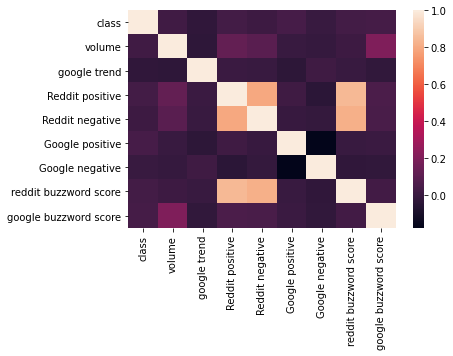

In [22]:
sns.heatmap(combined_df.corr())

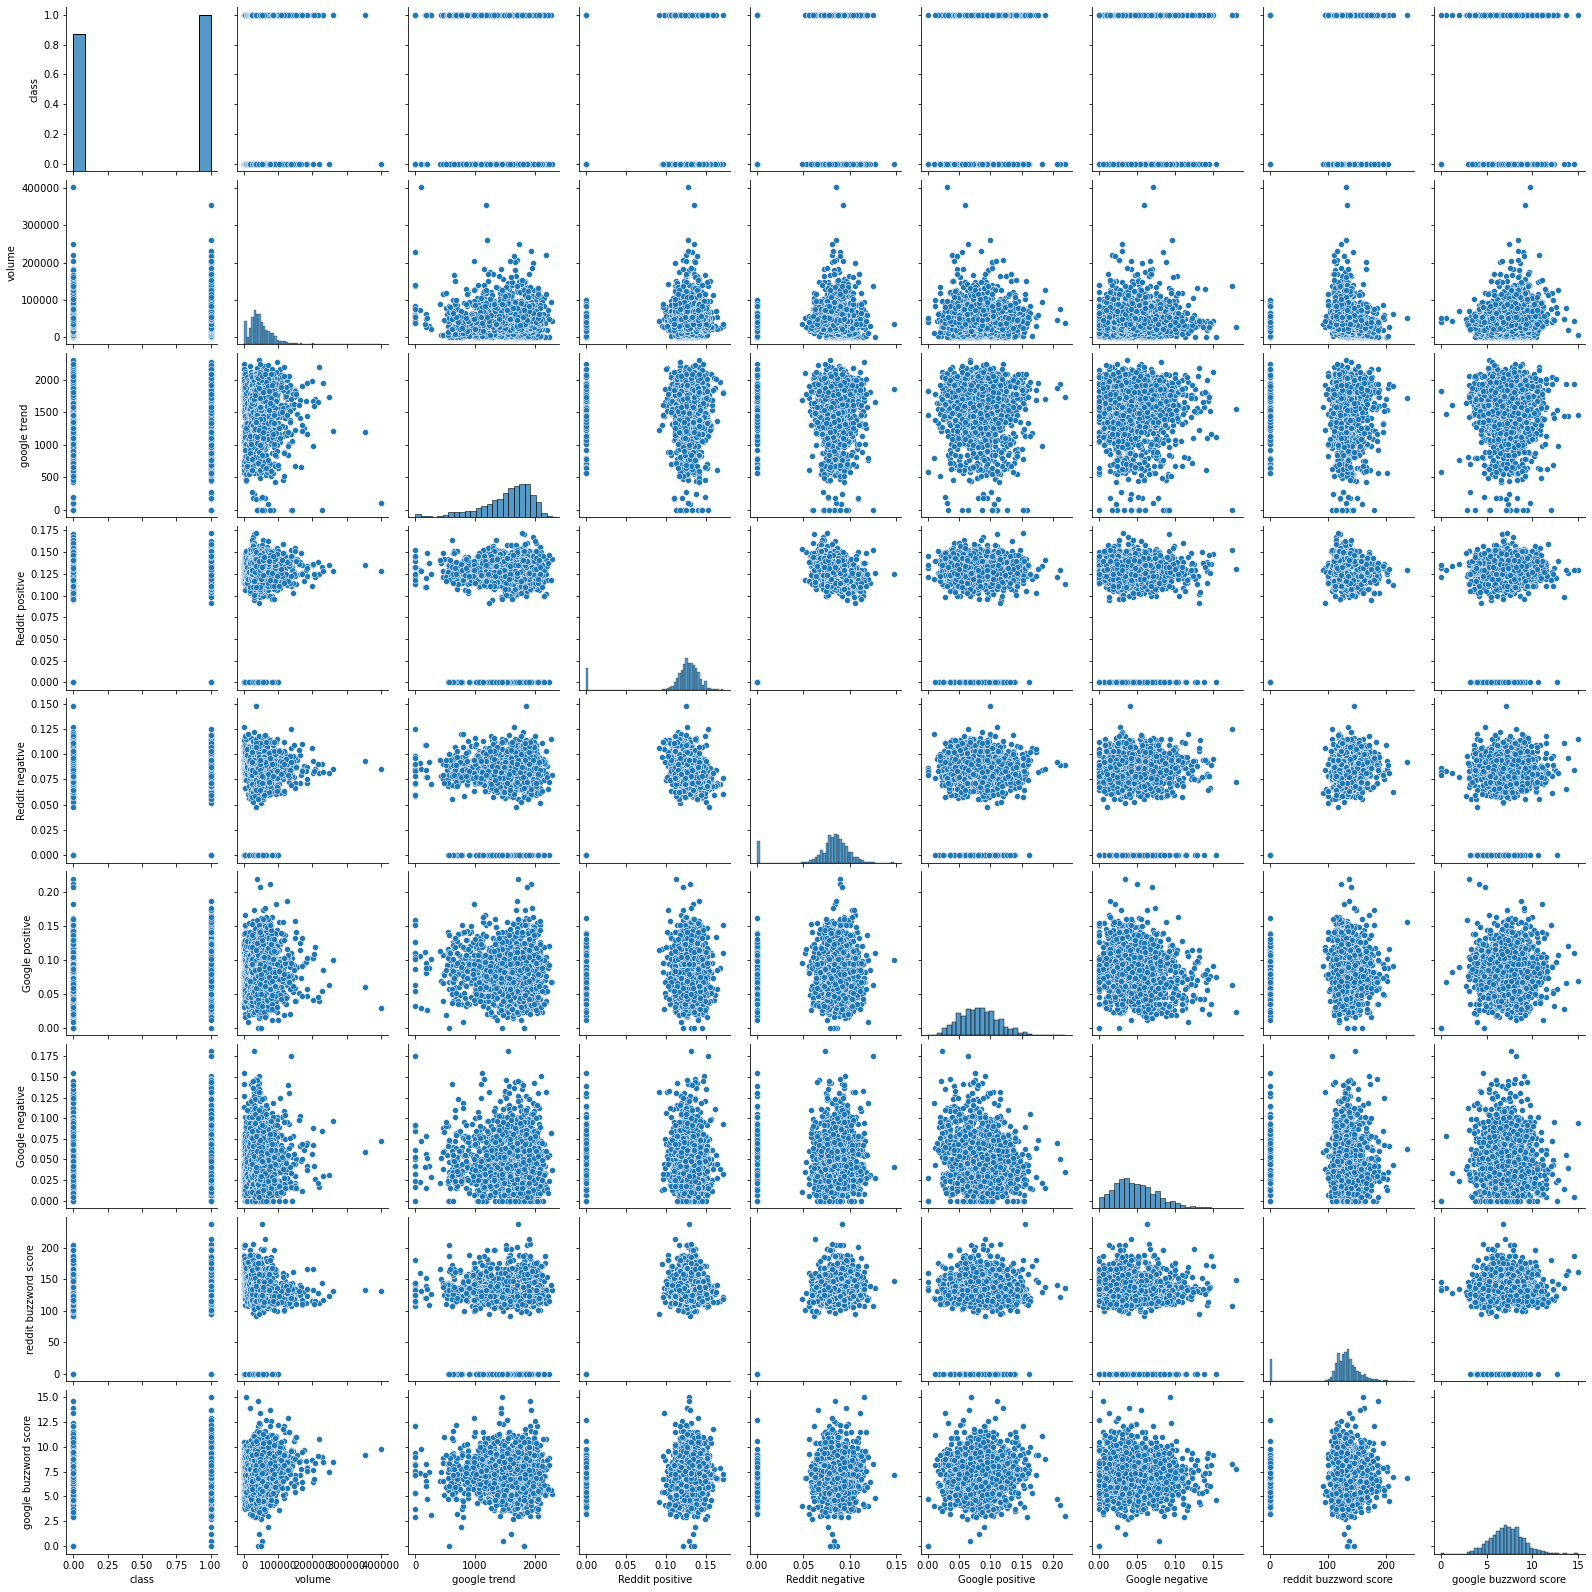

In [23]:
sns.pairplot(combined_df)

In [37]:
boxplots = combined_df.hvplot.box(by='class', y='volume', height=200, width=200)
for c in range(2, len(combined_df.columns)):
    boxplots += combined_df.hvplot.box(by='class', y=combined_df.columns[c], height=200, width=200)

In [38]:
boxplots

:Layout
   .BoxWhisker.I    :BoxWhisker   [class]   (volume)
   .BoxWhisker.II   :BoxWhisker   [class]   (google trend)
   .BoxWhisker.III  :BoxWhisker   [class]   (Reddit positive)
   .BoxWhisker.IV   :BoxWhisker   [class]   (Reddit negative)
   .BoxWhisker.V    :BoxWhisker   [class]   (Google positive)
   .BoxWhisker.VI   :BoxWhisker   [class]   (Google negative)
   .BoxWhisker.VII  :BoxWhisker   [class]   (reddit buzzword score)
   .BoxWhisker.VIII :BoxWhisker   [class]   (google buzzword score)